In [3]:
# Python
import pandas as pd
from prophet import Prophet


In [4]:
# Python
df = pd.read_csv('korea_m.csv')
df.head()

,ds,y
0,1907-10,13.9
1,1907-11,5.3
2,1907-12,-3.9
3,1908-01,-3.5
4,1908-02,-4.0


In [5]:
# Python
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive'
)
m.fit(df)

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.778
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3377.86    0.00388374       232.967           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3381.48    0.00636804         198.6           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3382.75   0.000240937       49.8141           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3383.56   0.000974336       93.3603      0.5226           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3383.88    0.00237487       54.1758      0.1699           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [6]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1720,2023-02-25
1721,2023-02-26
1722,2023-02-27
1723,2023-02-28
1724,2023-03-01


In [7]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1720,2023-02-25,7.102680,5.292142,8.875756
1721,2023-02-26,6.989602,5.247795,8.769672
1722,2023-02-27,6.695937,4.909356,8.465762
1723,2023-02-28,6.567762,4.779003,8.412727
1724,2023-03-01,6.279446,4.512483,7.879239


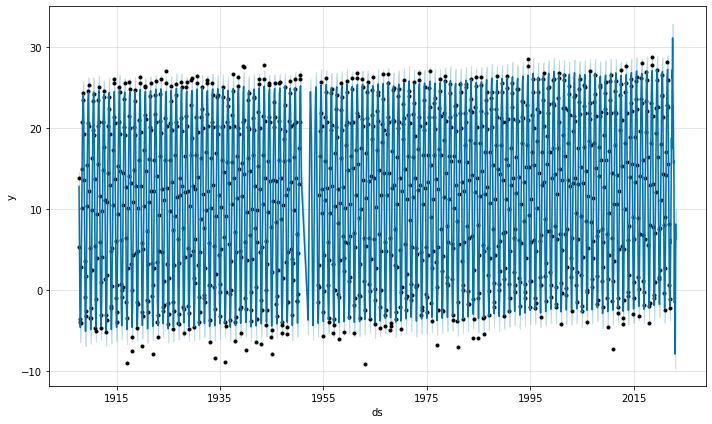

In [8]:
# Python
fig1 = m.plot(forecast)


/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


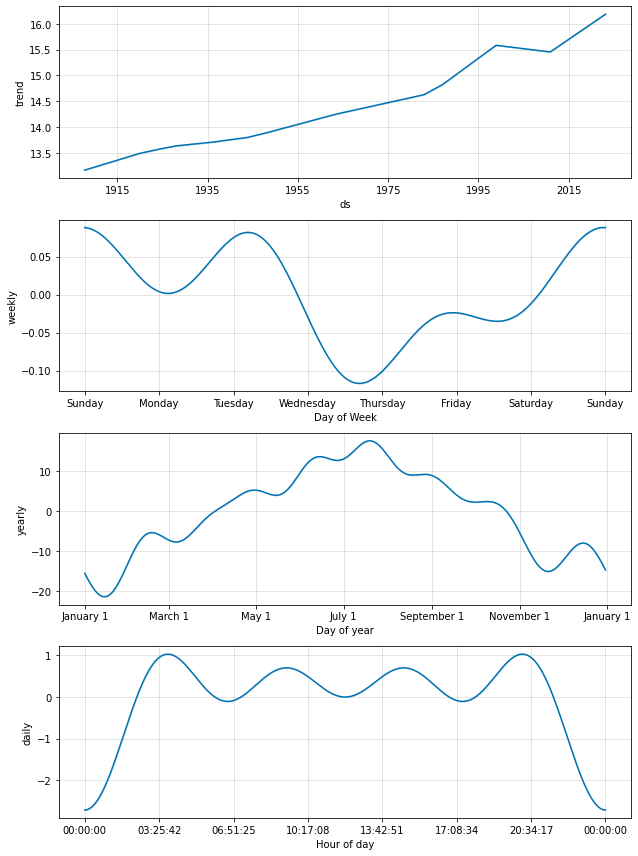

In [9]:
# Python
fig2 = m.plot_components(forecast)


In [10]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2021, 12, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 2, 1, 0, 0)], dtype=object),
              'y': array([13.9,  5.3, -3.9, ...,  0.6, -2.2, -1.1])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'y': array([10.95470762,  3.79250899, -3.91581546, ...,  4.90935581,  4.77900275,
                           4.51248298])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'y': array([12.79806138,  5.43997857, -2.11413627, ...,  6.69593709,  6.56776238,
                           6.27944557])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'y': array([14.63566869,  7.18370018, -0.3743344 , ...,  8.4657617 ,  8.41272733,
                           7.87923946])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'ds

In [ ]:
# Python
plot_components_plotly(m, forecast)


/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.51590611, 10.51735651, 10.51876012, ..., 13.33989904, 13.33998576,
                          13.34007248]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.51590611, 10.51735651, 10.51876012, ..., 13.33989904, 13.33998576,
                          13.34007248]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.51590611, 10.51735651, 10.51876012, ..., 13.33983767, 13.33992399,
                          13.34001032]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([-15.51653143, -16.19214757, -16.85277031, ..., -13.4718062 ,
                          -14.14916639, -14.83312973]),
              'yaxis': 'y2'}],
    'layout': {'height': 400,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'range': [1901-12-23 06:00:00, 2028-12-06 18:00:00],
                         'type': 'date'},
               'xaxis2': {'anchor': 'y2',
                          'domain': [0.0, 1.0],
                          'range': [2016-12-13 18:54:02.958904115, 2018-01-18
                                    11:04:57.863013581],
                          'tickformat': '%B %e',
                          'type': 'date'},
               'yaxis': {'anchor': 'x',
                         'domain': [0.575, 1.0],
                         'rangemode': 'normal',
      